# Import libraries

In [ ]:
import splineop_cpp as spop
from scipy.interpolate import PPoly
from scipy.interpolate import make_lsq_spline
import matplotlib.pyplot as plt
import numpy as np

# Generate data

In [ ]:
# To easily generate a quadratic spline we generate some random noise
# and fit a quadratic spline with knots chosen arbitrarily
np.random.seed(11) 
data = np.random.normal(0,1,1000)
x = np.linspace(0,1,1000)
bpoly = make_lsq_spline(x=x,
                   y=data,
                   k=2,
                   t=np.array([0,0,0,0.25,0.38,0.79,1,1,1])
                   )
ppoly = PPoly.from_spline(bpoly)

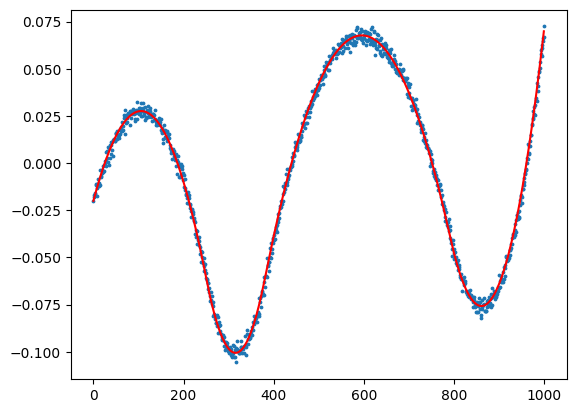

In [61]:
signal = ppoly(x)
noise_sd = 0.0025
noise = np.random.normal(0,noise_sd,1000)
noised_signal = signal + noise 

plt.scatter(x*1000,noised_signal,s=3)
plt.plot(signal, color="red")
plt.show()


In [ ]:
# Cpp implementation takes signals of shape (ndims, nobs)
# this can be thought with a mental image (see plot above, as an example)
# that the time "advances" in the horizontal axis
reshaped_noised_signal = noised_signal.reshape(1,1000) 

# SplineOP Demonstration on synthetic data

## Penalized model

In [ ]:
# init_speed_estimators is an array such that:
#   a. len(init_speed_estimators) is the number of initial speed estimators, and
#   b. init_speed_estimators[i] indicates, starting from the first point, up to where
#      to take into account for estimating the initial speed.  
init_speed_estimators = np.array([20,40,60,80,100], dtype=int)

data_var = float(0.0025**2) # Data variance here is known.
seed = 1 # seed for the random generation of states
nstates = 5 # number of states

# Instantiation of the penalized model
model_p = spop.SplineOP(
    reshaped_noised_signal 
    ,int(nstates)
    ,init_speed_estimators
    ,float(data_var)
    ,int(seed)    
)

In [ ]:
model_p.predict(0.01) # Predict with a given penalty
model_p.changepoints # knots are at [250,380,790], [999] is just bringing the last index 

[251, 381, 790, 999]

In [ ]:
c = [[-4.24397186,  9.32456605, -2.78330877,  7.57605375],
     [0.89898271, -1.22300322,  1.20138395, -1.08092924],
     [-0.02000463, -0.06050719, -0.06191245, -0.03721923],
     ]
knots = t=np.array([0,0.25,0.38,0.79,1])

In [ ]:
spline = PPoly(c=c,
                           x=knots,
                           )

In [25]:
import matplotlib.pyplot as plt

In [ ]:
polynomial_parameters = [[-5, 3,-3,10], # Accelerations
                         [], # Initial speeds
                         [], # Initial positions
                         ]
polynomial_intervals = [0,250,450,800,1000]

# Use of SplineOP